In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
cch2 = pd.read_csv("continental_US_CCH2_2/full_dataset.csv")
len(cch2)

/home/jackson/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,26,28,42,44,50,56,65,67,73,75) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


1510985

In [3]:
def get_species_of_interest():
    remove_species = [
        "mimulus guttatus",
        "erythranthe guttata",
        "erythranthe micorphylla",
        "e. grandis",
        "e. lagunensis",
        "e. unimaculata",
        "e. thermalis",
        "e. arenicola",
        "e. marmorata",
        "e. pardali",
        "e. pardalis",
        "e. arvensis",
        "e. brachystylis",
        "e. charlestonensis",
        "e. cordata",
        "hordeum vulgare",
        "lolium perenne"
    ]
    
    bioinf_prelim = pd.read_csv("Bioinformatics_Prelim_Research.csv", usecols=["Species","FCA protein link:"])
    species_of_interest = list(bioinf_prelim.loc[~bioinf_prelim["FCA protein link:"].isna(),"Species"])
    species_of_interest = [sp.split(" var. ")[0].split(" subsp. ")[0] for sp in species_of_interest if sp.lower() not in remove_species]
    species_of_interest = ["Guttata sensu lato"] + species_of_interest
    print("Found {} species of interest.".format(len(species_of_interest)))
    return species_of_interest

species_of_interest = get_species_of_interest()

Found 57 species of interest.


In [4]:
subsets = {}
for sp in species_of_interest:
    subset = cch2.loc[(cch2["scientificName"].str.lower()==sp.lower())]
    n_subset = len(subset)
    if subset is not None and n_subset > 50:
        print("{}: {}".format(sp, n_subset))
        subsets[sp] = subset
    elif n_subset < 50 and n_subset > 1:
        print("{}: {} -- Too few!".format(sp, n_subset))
    else:
        print("{} not found".format(sp))

Guttata sensu lato: 2145
Helianthus annuus: 549
Nicotiana attenuata: 479
Raphanus sativus: 748
Brassica rapa: 471
Ricinus communis: 352
Trifolium pratense: 213
Populus trichocarpa: 496
Cuscuta campestris: 178
Triticum aestivum: 246
Zostera marina: 178
Cynara cardunculus: 133
Trifolium subterraneum: 129
Selaginella moellendorffii not found
Glycine max not found
Vitis vinifera: 75
Amborella trichopoda not found
Citrus sinensis: 10 -- Too few!
Gossypium arboreum not found
Gossypium raimondii not found
Phaseolus angularis not found
Lactuca sativa: 9 -- Too few!
Citrus unshiu not found
Trema orientale not found
Artemisia annua: 21 -- Too few!
Cuscuta australis not found
Prunus yedoensis: 2 -- Too few!
Chara braunii not found
Cinnamomum micranthum f. kanehirae not found
Glycine soja not found
Arachis hypogaea: 4 -- Too few!
Vigna angularis not found
Mikania micrantha not found
Salix brachista not found
Prunus dulcis: 55
Hibiscus syriacus: 3 -- Too few!
Lupinus albus not found
Hevea brasilien

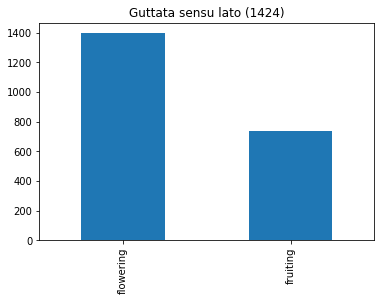

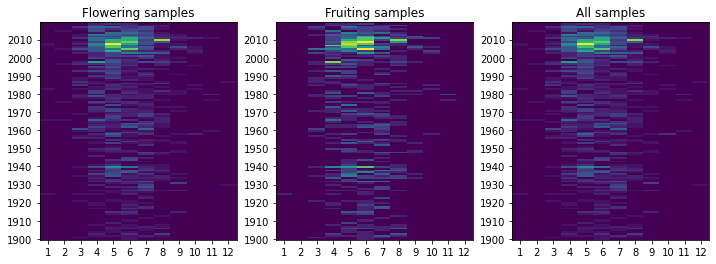

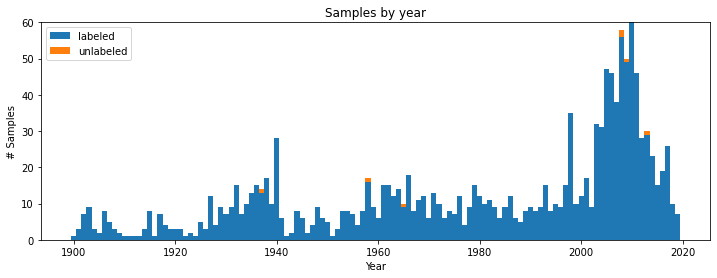

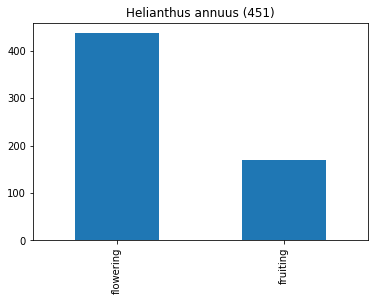

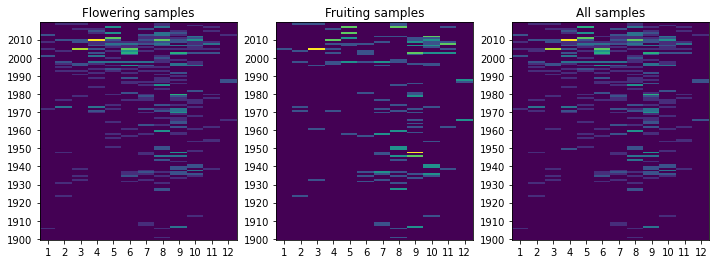

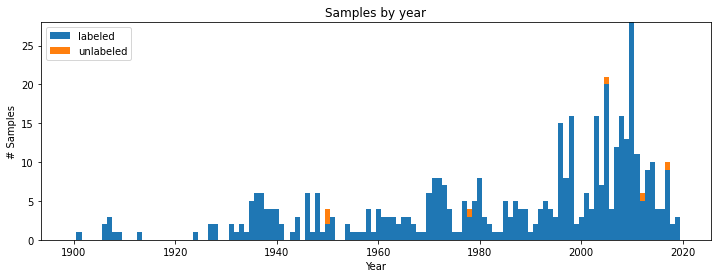

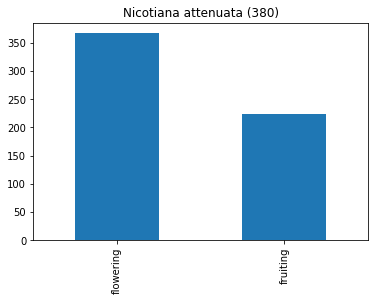

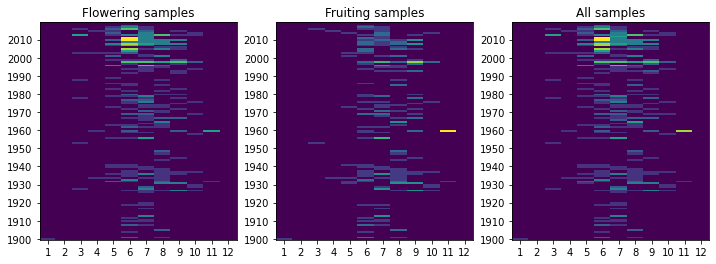

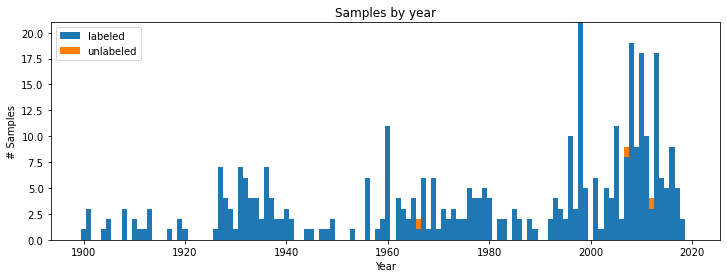

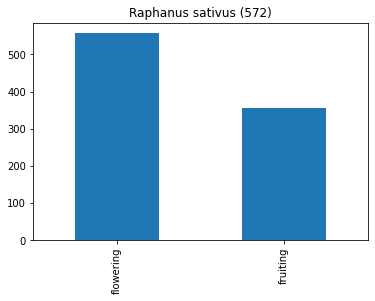

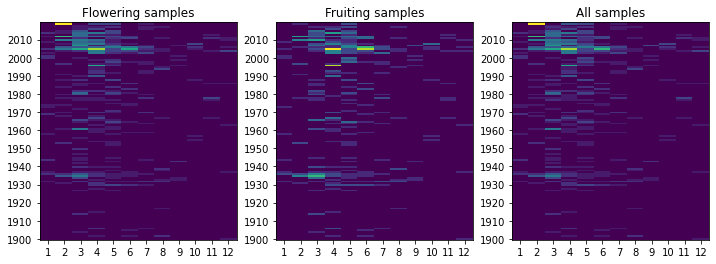

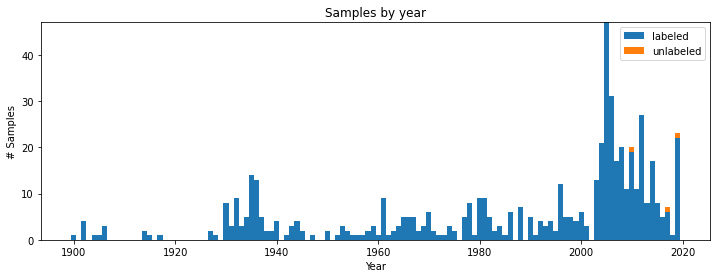

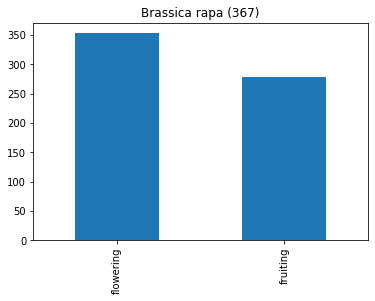

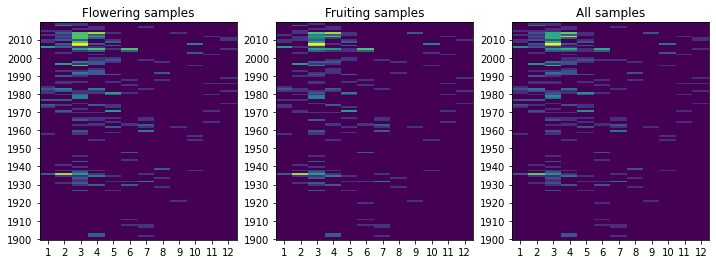

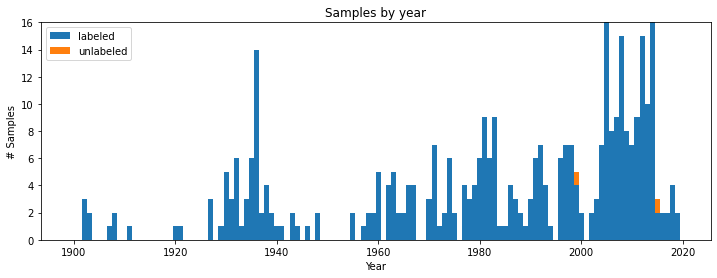

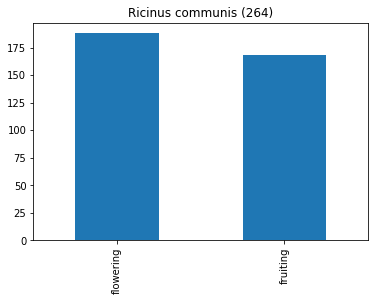

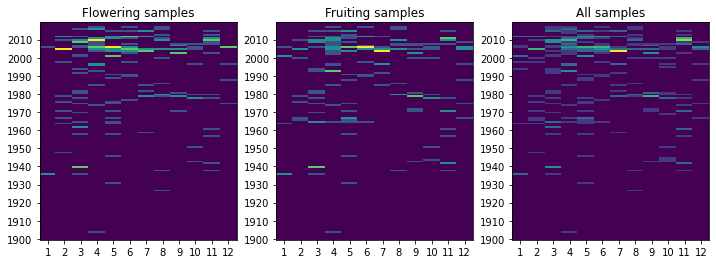

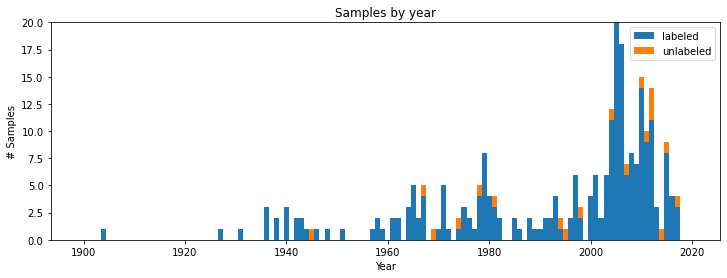

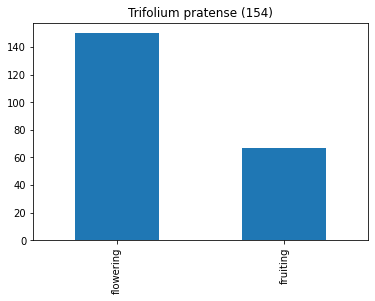

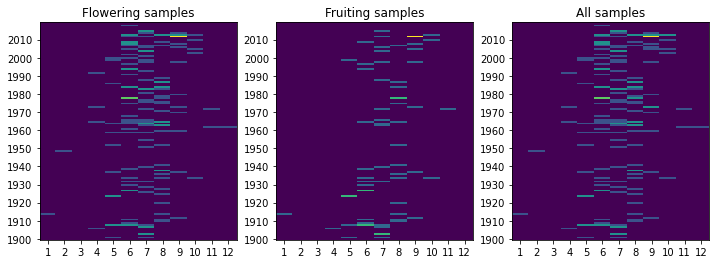

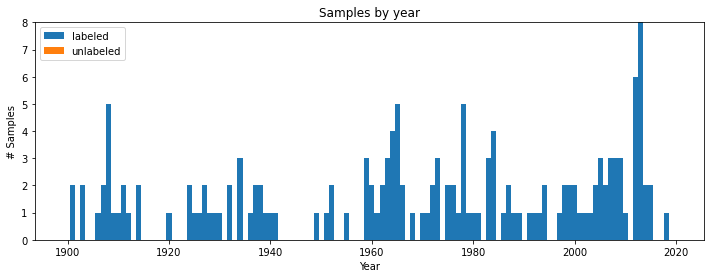

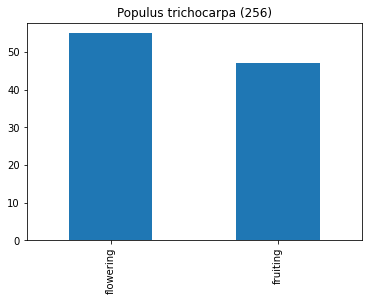

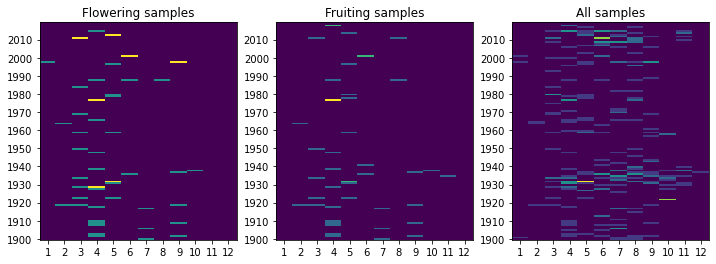

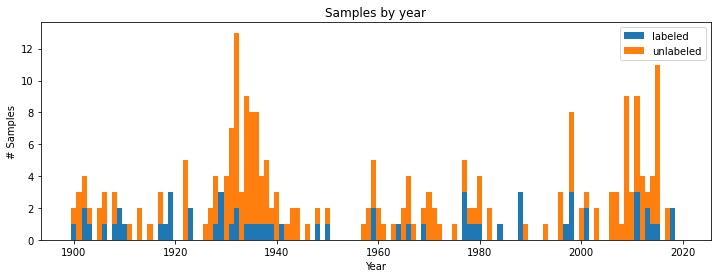

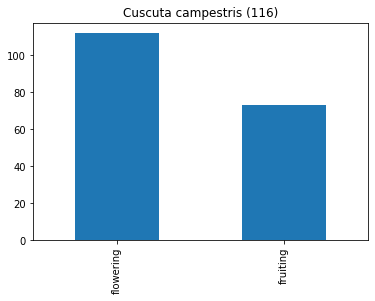

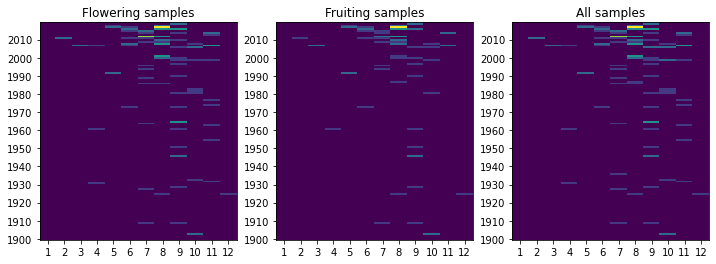

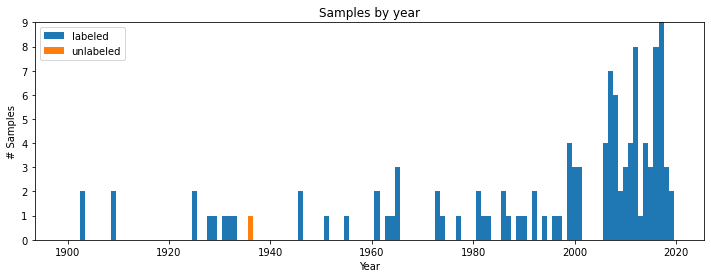

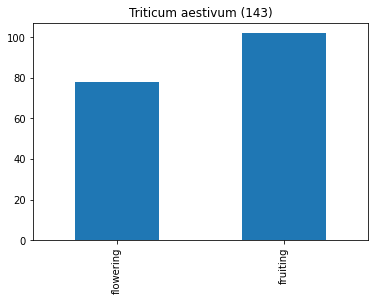

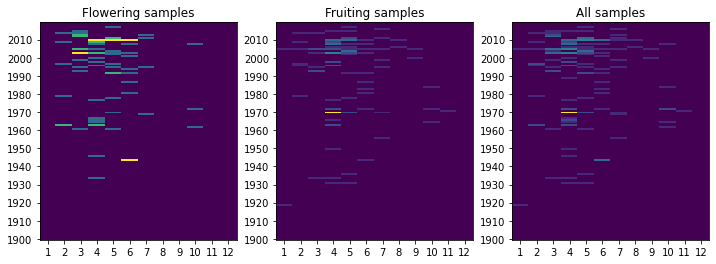

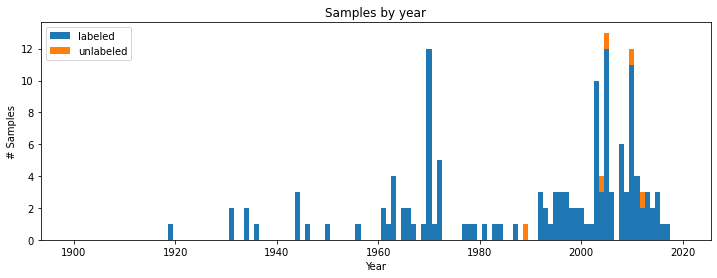

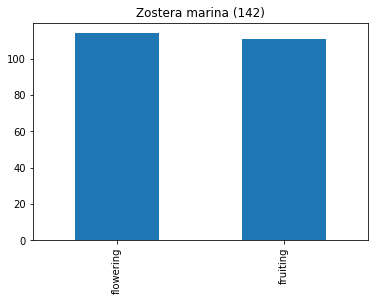

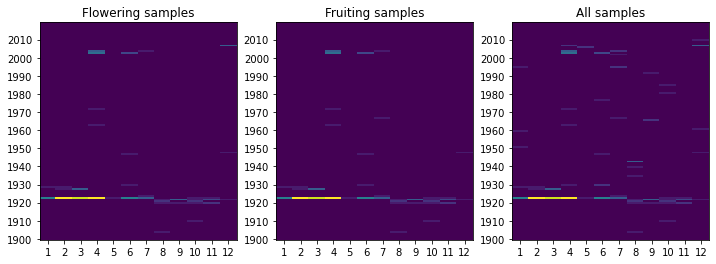

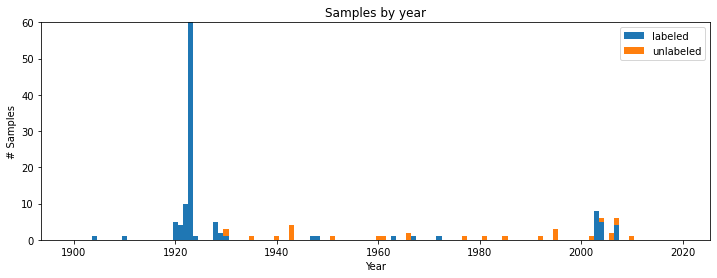

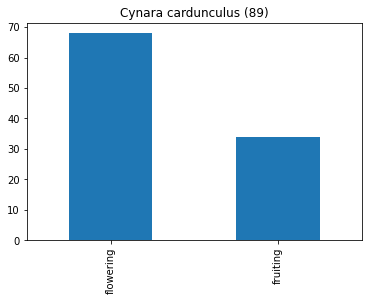

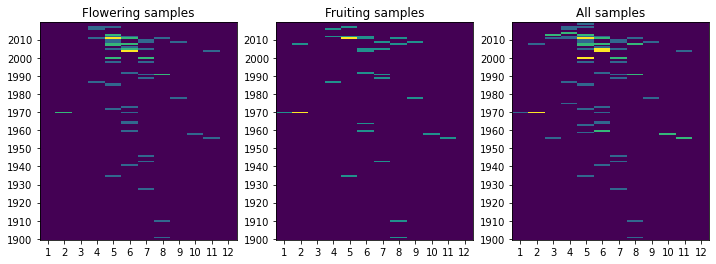

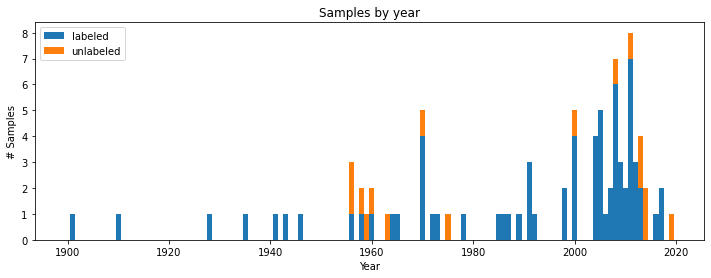

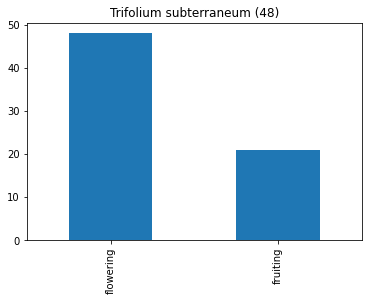

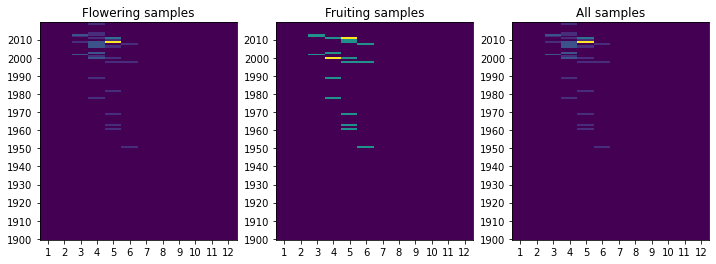

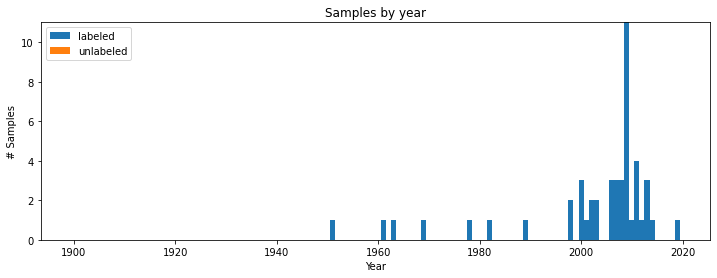

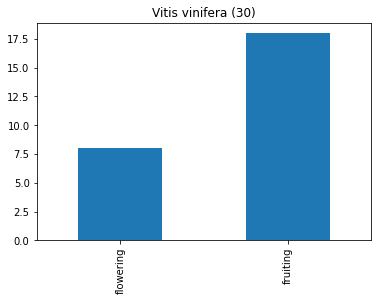

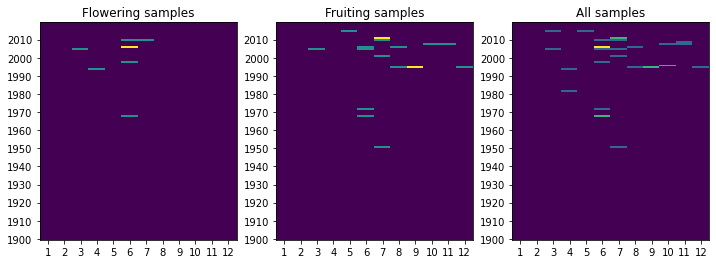

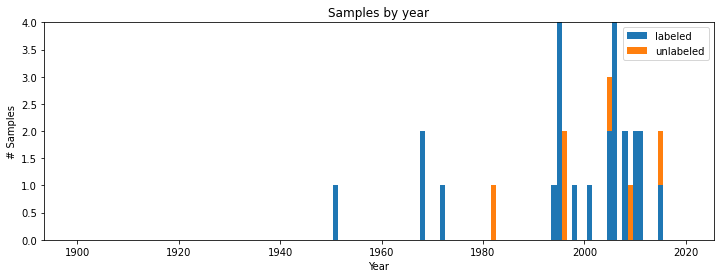

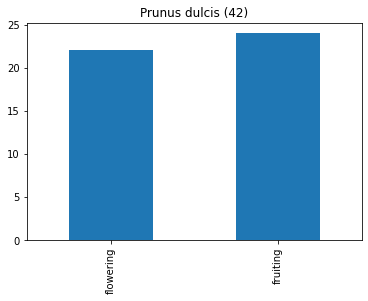

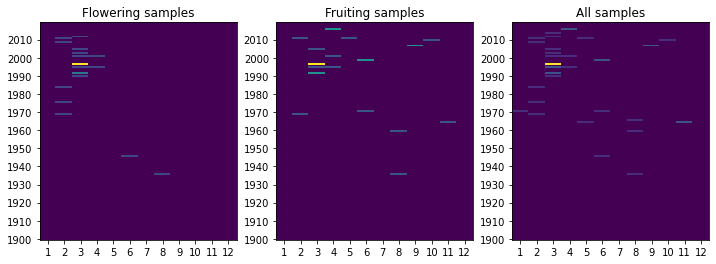

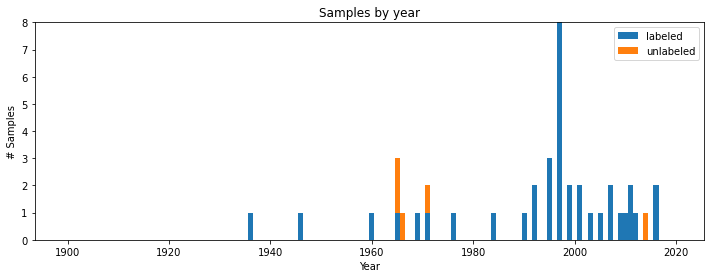

In [5]:
for sp, subset in subsets.items():
    subset = subset.loc[(~cch2["month"].isna()) &
                        (~cch2["flowering"].isna()) &
                        (~cch2["fruiting"].isna())]
    subset[["flowering", "fruiting"]].sum(axis=0).plot.bar(title="{} ({})".format(sp, len(subset)))
    plt.show()

    _, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

    by_time = pd.crosstab(subset.loc[subset["flowering"]==1, "year"].astype(int), subset.loc[subset["flowering"]==1, "month"].astype(int))
    by_time = by_time.reindex(index=range(1900, 2020), columns=range(1, 13)).fillna(0)
    subsampled_index = range(1900, 2020, 10)
    ax1.pcolor(by_time)
    ax1.set_title("Flowering samples")
    ax1.set_yticks(np.arange(0.5, len(subsampled_index)*10, 10))
    ax1.set_yticklabels(subsampled_index)
    ax1.set_xticks(np.arange(0.5, len(by_time.columns), 1))
    ax1.set_xticklabels(by_time.columns)

    by_time = pd.crosstab(subset.loc[subset["fruiting"]==1, "year"].astype(int), subset.loc[subset["fruiting"]==1, "month"].astype(int))
    by_time = by_time.reindex(index=range(1900, 2020), columns=range(1, 13)).fillna(0)
    ax2.pcolor(by_time)
    ax2.set_title("Fruiting samples")
    ax2.set_yticks(np.arange(0.5, len(subsampled_index)*10, 10))
    ax2.set_yticklabels(subsampled_index)
    ax2.set_xticks(np.arange(0.5, len(by_time.columns), 1))
    ax2.set_xticklabels(by_time.columns)

    by_time = pd.crosstab(subset["year"].astype(int), subset["month"].astype(int))
    by_time = by_time.reindex(index=range(1900, 2020), columns=range(1, 13)).fillna(0)
    ax3.pcolor(by_time)
    ax3.set_title("All samples")
    ax3.set_yticks(np.arange(0.5, len(subsampled_index)*10, 10))
    ax3.set_yticklabels(subsampled_index)
    ax3.set_xticks(np.arange(0.5, len(by_time.columns), 1))
    ax3.set_xticklabels(by_time.columns)
    plt.show()

    plt.figure(figsize=(12,4))
    years = subset.loc[((subset["flowering"]==1)|(subset["fruiting"]==1)), "year"].astype(int).value_counts()
    years_labeled = years.reindex(range(1900, 2020)).fillna(0)
    plt.bar(years_labeled.index,
            years_labeled.values,
            1.0,
            label="labeled")
    years = subset["year"].astype(int).value_counts()
    years_unlabeled = years.reindex(range(1900, 2020)).fillna(0) - years_labeled
    plt.bar(years_unlabeled.index,
            years_unlabeled.values,
            1.0,
            bottom=years_labeled.values,
            label="unlabeled")
    plt.legend()
    plt.title("Samples by year")
    plt.xlabel("Year")
    plt.ylabel("# Samples")
    plt.show()

Guttata sensu lato


100%|██████████| 125/125 [00:00<00:00, 771.04it/s]

Helianthus annuus



100%|██████████| 125/125 [00:00<00:00, 767.98it/s]

Nicotiana attenuata



100%|██████████| 123/123 [00:00<00:00, 760.81it/s]

Raphanus sativus



100%|██████████| 124/124 [00:00<00:00, 780.79it/s]

Brassica rapa



100%|██████████| 125/125 [00:00<00:00, 764.74it/s]


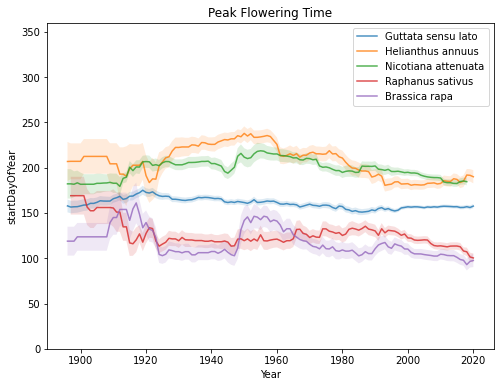

In [37]:
window = 12

for sp, subset in subsets.items():
    subset = subset[["year", "startDayOfYear", "flowering"]].dropna()
    avg_month_flower = []
    high_CI = []
    low_CI = []
    avg_month_years = []
    years = []
    if len(subset) < 300:
        continue
    else:
        print(sp, flush=True)
    for center_yr in tqdm(range(subset["year"].min(), subset["year"].max()+1)):
        considered = subset.loc[(abs(subset["year"] - center_yr) <= window)].drop("year", axis=1)
        flowering_days = considered.loc[considered["flowering"]==1, "startDayOfYear"]
        avg_month_flower.append(flowering_days.mean())
        high_CI.append(flowering_days.mean() + flowering_days.std()/np.sqrt(len(flowering_days)))
        low_CI.append(flowering_days.mean() - flowering_days.std()/np.sqrt(len(flowering_days)))
        avg_month_years.append(center_yr)
    avg_month_flower = np.array(avg_month_flower)
    avg_month_years = np.array(avg_month_years)
    years = np.array(years)
    plt.fill_between(avg_month_years, low_CI, high_CI, alpha=0.15)
    plt.plot(avg_month_years, avg_month_flower, alpha=0.8, label=sp)
plt.xlabel("Year")
plt.ylabel("startDayOfYear")
plt.legend()
plt.ylim((0, 360))
plt.gcf().set_size_inches(8, 6)
plt.title("Peak Flowering Time")
plt.show()